# Problème 3


## Importer les outils

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur


## Définir les constantes du problème

In [0]:
Vdot = 10 # L/min

FA0 = 1.5 * Vdot # mol/min
FB0 = 2 * Vdot # mol/min
FC0 = 0 * Vdot # mol/min
FD0 = 0 * Vdot # mol/min
FE0 = 0 * Vdot # mol/min
FF0 = 0 * Vdot # mol/min

## Définir les équations à résoudre

In [0]:
def equations(variables, V):
    FA, FB, FC, FD, FE, FF = variables
    
    cA = FA/Vdot
    cB = FB/Vdot
    cC = FC/Vdot
    cD = FD/Vdot
    cE = FE/Vdot
    cF = FF/Vdot

    r1 = 0.25 * cA * cB # mol/L*min
    r2 = 0.1 * cA * cD # mol/L*min
    r3 = 5 * cB**2 * cC # mol/L*min
    
    RA = - r1 - 3 * r2
    RB = -2 * r1 - r3
    RC = r1 + r2 - 2 * r3
    RD = r1 - 2 * r2 + r3
    RE = r2
    RF = r3
    
    dFAdV = RA
    dFBdV = RB
    dFCdV = RC
    dFDdV = RD
    dFEdV = RE
    dFFdV = RF
 
    return dFAdV, dFBdV, dFCdV, dFDdV, dFEdV, dFFdV

## Définir les conditions initiales

In [0]:
conditions_initiales = [FA0, FB0, FC0, FD0, FE0, FF0] # mol/min

## Résoudre le problème à l'aide du solveur

In [0]:
V = np.linspace(0, 50, 51) # définir les bornes d'intégration

resultats = solveur.odeint(
    equations, 
    conditions_initiales, 
    V, 
)

In [0]:
FA = resultats[:,0]

In [0]:
FB = resultats[:,1]

In [0]:
FC = resultats[:,2]

In [0]:
FD = resultats[:,3]

In [0]:
FE = resultats[:,4]

In [0]:
FF = resultats[:,5]

In [0]:
X = (FA0 - FA)/ FA0

## Visualiser les résultats

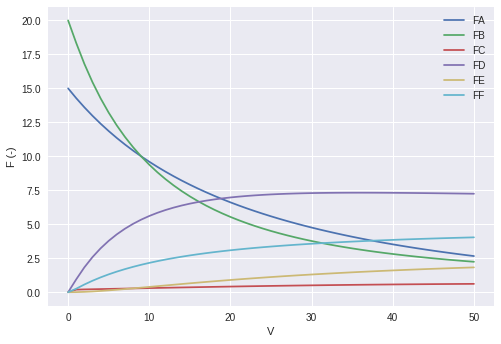

In [67]:
plt.plot(V, FA, V, FB, V, FC, V, FD, V, FE, V, FF)
plt.xlabel('V')
plt.ylabel('F (-)')
plt.legend(['FA', 'FB', 'FC', 'FD', 'FE', 'FF'])
plt.show()

In [68]:
FA[50]

2.6594013076273995

In [69]:
FC[50]

0.6142216983366968

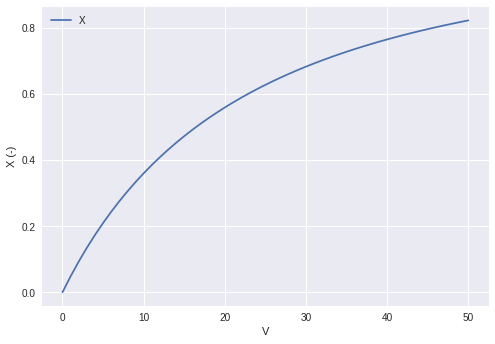

In [70]:
plt.plot(V, X)
plt.xlabel('V')
plt.ylabel('X (-)')
plt.legend(['X'])
plt.show()

In [71]:
X[50]

0.8227065794915067